In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import os

In [20]:
plt.style.use('seaborn-v0_8-muted')
palette = (sns.color_palette()).as_hex()

<code>https://www.eia.gov/international/data/world</code> -> Total Energy -> Total energy consumption

In [55]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{v:.3f}\n{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

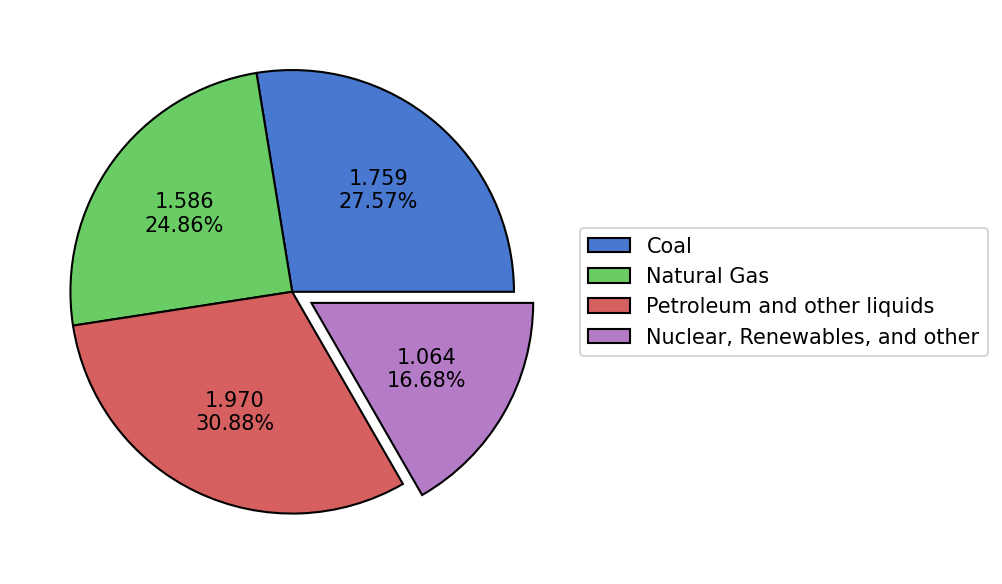

In [74]:
fig, ax = plt.subplots(dpi=150) # add dpi=300 to save the image in high resolution
values = [1.759, 1.586, 1.970, 1.064]
ax.pie(values,
       explode=[0, 0, 0, 0.1],
       wedgeprops={'edgecolor': 'black'},
       autopct=make_autopct(values),
       startangle=0)
# ax.set_title('World\'s Energy Consumption by Source, 2021 [10$^{20}J$]')
_ = ax.legend(loc='center left', 
          labels=['Coal', 'Natural Gas', 'Petroleum and other liquids', 'Nuclear, Renewables, and other'],
          bbox_to_anchor=(1, 0, 0.5, 1))

<code>https://www.iea.org/data-and-statistics/data-tools/greenhouse-gas-emissions-from-energy-data-explorer</code>

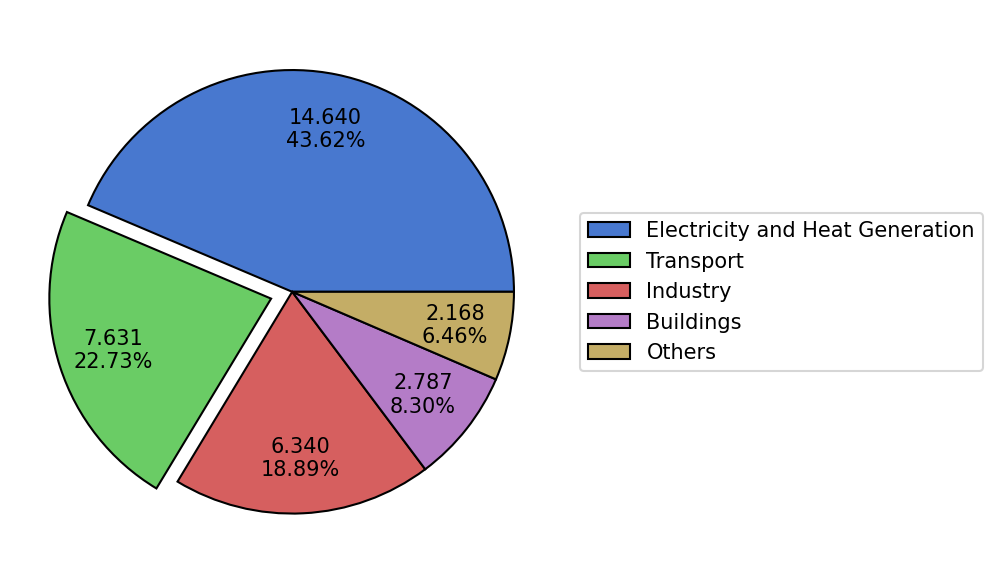

In [73]:
fig, ax = plt.subplots(dpi=150) # add dpi=300 to save the image in high resolution
values = [14.64, 7.631, 6.340, 2.787, 2.168]
ax.pie(values,
       explode=[0, 0.1, 0, 0, 0],
       wedgeprops={'edgecolor': 'black'},
       autopct=make_autopct(values),
       pctdistance=0.75,
       startangle=0)
# ax.set_title('Global CO2 emissions from fuel combustion by sector with electricity and heat separated, World [$GtCO_2$]')
_ = ax.legend(loc='center left', 
          labels=['Electricity and Heat Generation', 'Transport', 'Industry', 'Buildings', 'Others'],
          bbox_to_anchor=(1, 0, 0.5, 1))

<code>https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv</code> Atmospheric CO2 level

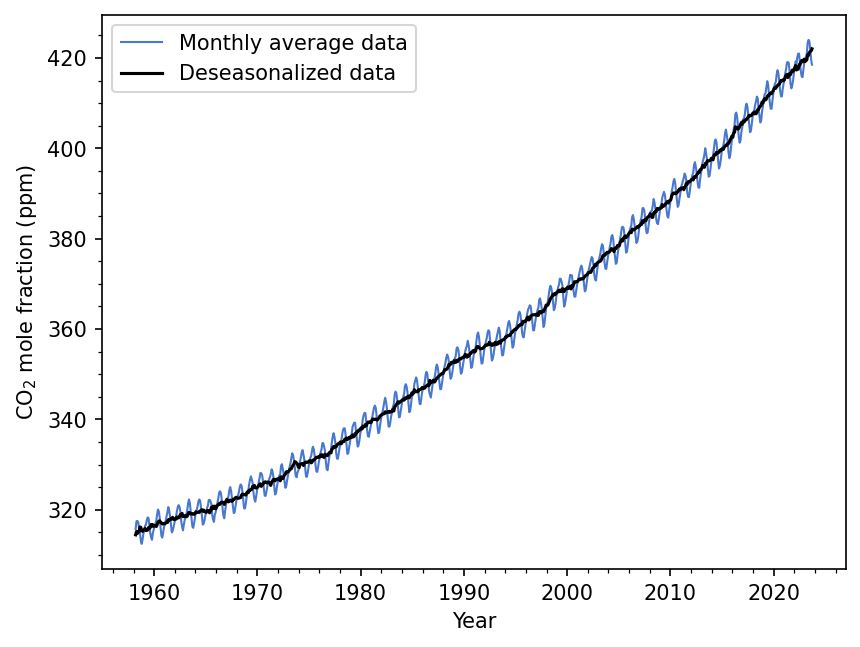

In [71]:
df = pd.read_csv('atmospheric_co2.csv')
fig, ax = plt.subplots(dpi=150) # add dpi=300 to save the image in high resolution
sns.lineplot(ax=ax, data=df, x='decimal date', y='average', linewidth=1, label='Monthly average data')
sns.lineplot(ax=ax, data=df, x='decimal date', y='deseasonalized', linewidth=1.5, c='k', label='Deseasonalized data')
ax.set_xlabel('Year')
ax.set_ylabel('CO$_2$ mole fraction (ppm)')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.set_title('Atmospheric CO$_2$ Concentration, 1958-2023')
_ = ax.legend(loc='upper left')